In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
datos = r"C:\Users\salva\Desktop\Data Science The Bridge\Data Science clase GitHub\DATA ESTEFY 2025\EDA ESTEFY\DATOS\amazon_sales_data 2025.csv"
df = pd.read_csv(datos)
df

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
0,ORD0001,14-03-25,Running Shoes,Footwear,60,3,180,Emma Clark,New York,Debit Card,Cancelled
1,ORD0002,20-03-25,Headphones,Electronics,100,4,400,Emily Johnson,San Francisco,Debit Card,Pending
2,ORD0003,15-02-25,Running Shoes,Footwear,60,2,120,John Doe,Denver,Amazon Pay,Cancelled
3,ORD0004,19-02-25,Running Shoes,Footwear,60,3,180,Olivia Wilson,Dallas,Credit Card,Pending
4,ORD0005,10-03-25,Smartwatch,Electronics,150,3,450,Emma Clark,New York,Debit Card,Pending
...,...,...,...,...,...,...,...,...,...,...,...
245,ORD0246,17-03-25,T-Shirt,Clothing,20,2,40,Daniel Harris,Miami,Debit Card,Cancelled
246,ORD0247,30-03-25,Jeans,Clothing,40,1,40,Sophia Miller,Dallas,Debit Card,Cancelled
247,ORD0248,05-03-25,T-Shirt,Clothing,20,2,40,Chris White,Denver,Debit Card,Cancelled
248,ORD0249,08-03-25,Smartwatch,Electronics,150,3,450,Emily Johnson,New York,Debit Card,Cancelled


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Order ID           250 non-null    object
 1   Date               250 non-null    object
 2   Product            250 non-null    object
 3   Category           250 non-null    object
 4   Price              250 non-null    int64 
 5   Quantity           250 non-null    int64 
 6   Total Sales        250 non-null    int64 
 7   Customer Name      250 non-null    object
 8   Customer Location  250 non-null    object
 9   Payment Method     250 non-null    object
 10  Status             250 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.6+ KB


In [84]:
df["Total_Calculado"] = df["Price"] * df["Quantity"]
consistencia_total_sales = (df["Total Sales"] == df["Total_Calculado"]).all()

df["Date"] = pd.to_datetime(df["Date"], format="%d-%m-%y")

df.drop(columns=["Total_Calculado"], inplace=True)

duplicados = df.duplicated().sum()

consistencia_total_sales, valores_nulos, duplicados

(True,
 Order ID             0
 Date                 0
 Product              0
 Category             0
 Price                0
 Quantity             0
 Total Sales          0
 Customer Name        0
 Customer Location    0
 Payment Method       0
 Status               0
 dtype: int64,
 0)

In [108]:
df_ordenado = df.sort_values(by="Date", ascending=True)
df_ordenado

,Order ID,Date,Product,Category,Price,Quantity,Total Sales,Customer Name,Customer Location,Payment Method,Status
207,ORD0208,2025-02-02,Refrigerator,Home Appliances,1200,3,3600,John Doe,Miami,PayPal,Completed
90,ORD0091,2025-02-03,Laptop,Electronics,800,4,3200,Daniel Harris,Houston,Gift Card,Pending
200,ORD0201,2025-02-03,Book,Books,15,4,60,Michael Brown,San Francisco,Credit Card,Completed
27,ORD0028,2025-02-03,Headphones,Electronics,100,1,100,Jane Smith,Chicago,Amazon Pay,Completed
244,ORD0245,2025-02-04,Laptop,Electronics,800,1,800,Michael Brown,Los Angeles,Credit Card,Cancelled
...,...,...,...,...,...,...,...,...,...,...,...
16,ORD0017,2025-04-01,T-Shirt,Clothing,20,1,20,Emma Clark,New York,Amazon Pay,Completed
33,ORD0034,2025-04-02,T-Shirt,Clothing,20,5,100,Jane Smith,New York,Credit Card,Pending
181,ORD0182,2025-04-02,T-Shirt,Clothing,20,5,100,Emma Clark,Denver,PayPal,Completed
34,ORD0035,2025-04-02,Laptop,Electronics,800,3,2400,Emma Clark,Denver,Amazon Pay,Completed


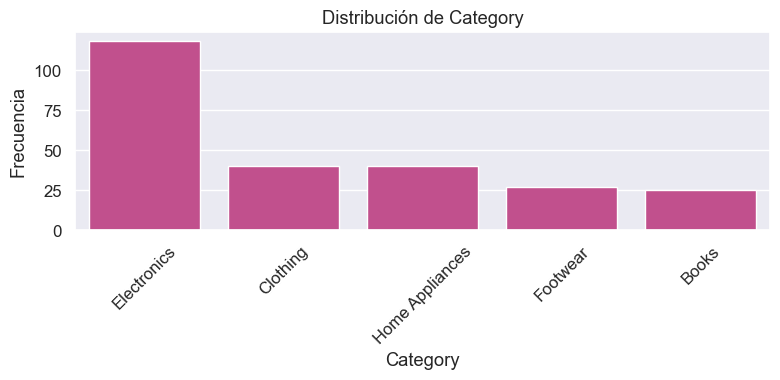

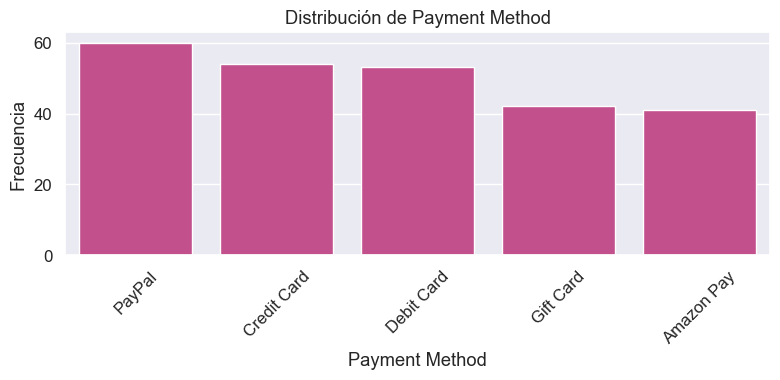

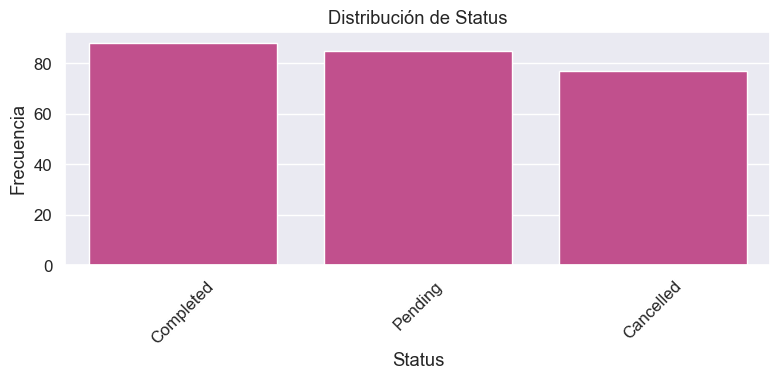

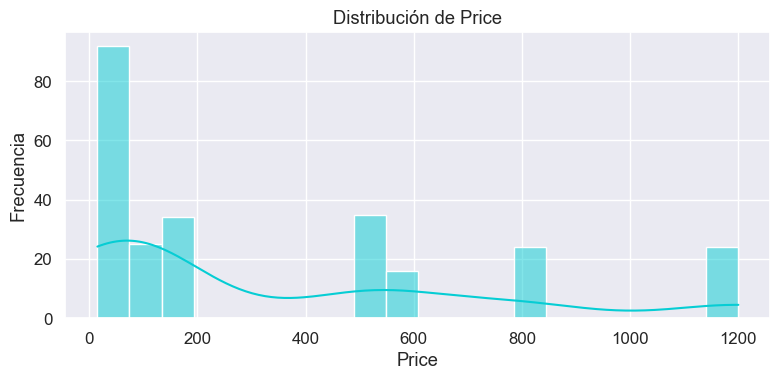

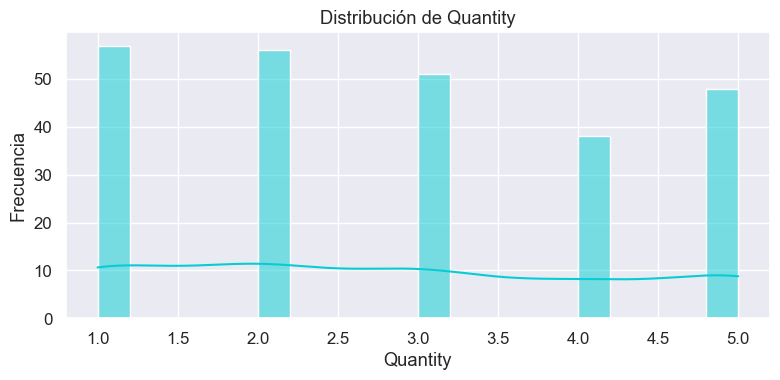

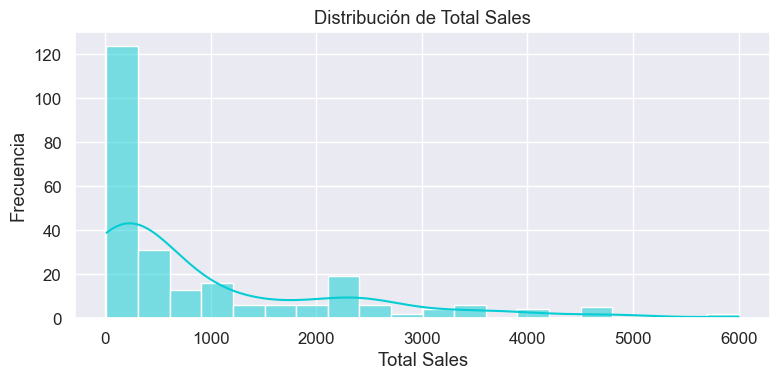

In [102]:
plt.style.use('ggplot')
sns.set(font_scale=1.1)


categ_columns = ["Category", "Payment Method", "Status"]
categ_distrib = {col: df[col].value_counts() for col in categ_columns}
numeric_columns = ["Price", "Quantity", "Total Sales"]
numeric_descrip = df[numeric_columns].describe()


for col in categ_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, order=categ_distrib[col].index, color="#d43d8e")
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


for col in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], bins=20, kde=True, color="#06cdd4")
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

In [42]:
avg_sales_by_category = df.groupby("Category")["Total Sales"].mean()
avg_sales_by_category

Category
Books                41.400000
Clothing             88.500000
Electronics        1101.271186
Footwear            160.000000
Home Appliances    2625.000000
Name: Total Sales, dtype: float64

In [40]:
#Cancelaciones por método de pago
cancelaciones_por_metodo = df[df["Status"] == "Cancelled"]["Payment Method"].value_counts(normalize=True)
cancelaciones_por_metodo

Payment Method
Debit Card     0.259740
Gift Card      0.233766
Credit Card    0.207792
PayPal         0.207792
Amazon Pay     0.090909
Name: proportion, dtype: float64

In [38]:
#Ventas promedio por método de pago
ventas_por_metodo = df.groupby("Payment Method")["Total Sales"].mean()
ventas_por_metodo

Payment Method
Amazon Pay      798.780488
Credit Card    1140.648148
Debit Card      601.886792
Gift Card      1141.785714
PayPal         1160.750000
Name: Total Sales, dtype: float64

In [44]:
df["Month"] = df["Date"].dt.month
ventas_por_mes = df.groupby("Month")["Total Sales"].sum()
ventas_por_mes

Month
2    122695
3    117730
4      3420
Name: Total Sales, dtype: int64

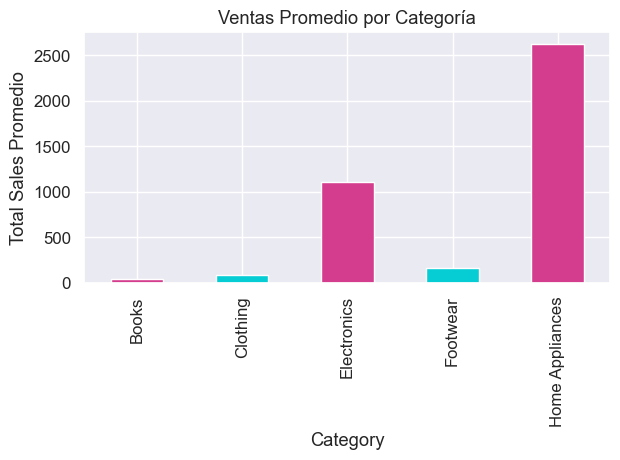

In [58]:
avg_sales_by_category.plot(kind='bar', color=['#d43d8e', '#06cdd4'])
plt.title("Ventas Promedio por Categoría")
plt.ylabel("Total Sales Promedio")
plt.tight_layout()
plt.show()

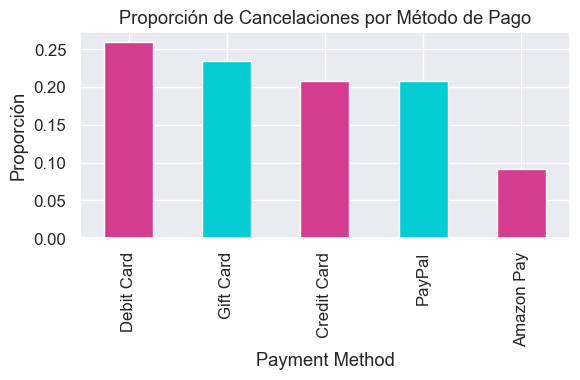

In [60]:
plt.figure(figsize=(6, 4))
cancelaciones_por_metodo.plot(kind='bar', color=['#d43d8e', '#06cdd4'])
plt.title("Proporción de Cancelaciones por Método de Pago")
plt.ylabel("Proporción")
plt.tight_layout()
plt.show()

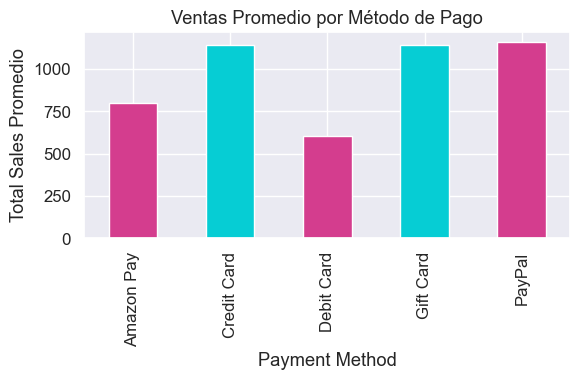

In [104]:
plt.figure(figsize=(6, 4))
ventas_por_metodo.plot(kind='bar', color=['#d43d8e', '#06cdd4'])
plt.title("Ventas Promedio por Método de Pago")
plt.ylabel("Total Sales Promedio")
plt.tight_layout()
plt.show()

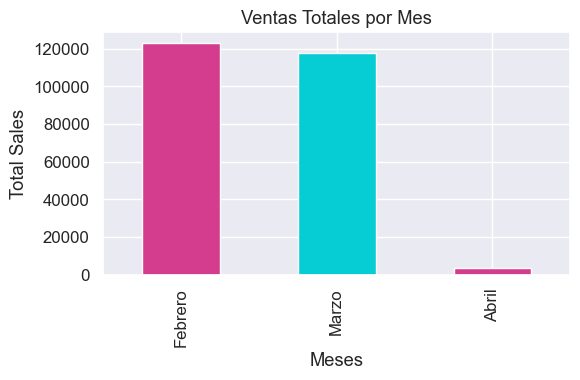

In [106]:
plt.figure(figsize=(6, 4))
ventas_por_mes.plot(kind='bar', color=["#d43d8e", "#06cdd4"])
plt.title("Ventas Totales por Mes")
plt.ylabel("Total Sales")
plt.xlabel("Meses")
plt.xticks(ticks=[0, 1, 2], labels=["Febrero", "Marzo", "Abril"])
plt.tight_layout()
plt.show()